## Removing NA valued columns and using numeric data only 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./all/train.csv')

In [4]:
data.shape

(1460, 81)

In [5]:
data = data.dropna(axis=1)
data.shape

(1460, 62)

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
int_feats = []
for types in X.dtypes.iteritems():
    if str(types[1]) == 'int64': 
        int_feats.append(types[0])
        
# ID don't seem to help
int_feats.remove('Id')

# Keeping only numeric features
non_num = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
print(int_feats)
int_feats = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
X = X.loc[:,int_feats]
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008


In [10]:
X.shape

(1460, 25)

In [11]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:
from sklearn.model_selection  import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
clf = RandomForestRegressor(n_jobs=-1)

In [16]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

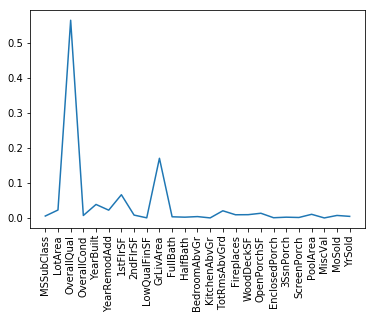

In [17]:
plt.plot(clf.feature_importances_)
plt.xticks(range(len(X.columns)), X.columns, rotation=90);

In [18]:
clf.score(X_train, y_train)

0.9520023162849082

In [19]:
clf.score(X_test, y_test)

0.8473171676427653

In [20]:
from sklearn.linear_model import Ridge

In [21]:
linRidge = Ridge().fit(X_train, y_train)

In [22]:
linRidge.score(X_train, y_train)

0.799422842545287

In [23]:
linRidge.score(X_test, y_test)

0.7720968651052668

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [28]:
linRidgePoly = Ridge().fit(X_train_poly, y_train)
linRidgePoly.score(X_train_poly, y_train)

0.8905558936027654

In [29]:
linRidgePoly.score(X_test_poly, y_test)

0.8053287157605031

## Handling missing values in a better way instead of just dropping 

In [59]:
data = pd.read_csv('./all/train.csv')
print(data.shape)

(1460, 81)


In [61]:
int_feats = []
for types in data.dtypes.iteritems():
    if str(types[1]) == 'int64': 
        int_feats.append(types[0])
        
# ID don't seem to help
int_feats.remove('Id')

# Keeping only numeric features
non_num = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

for nn in non_num:
    int_feats.remove(nn)

print(int_feats)

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [62]:
data2 = data[int_feats]

In [63]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

In [64]:
from sklearn.model_selection  import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
from sklearn.preprocessing import Imputer

In [67]:
imp = Imputer()

In [68]:
imputed_X_train = imp.fit_transform(X_train)
imputed_X_test = imp.transform(X_test)

### Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
clf_imp = RandomForestRegressor(n_jobs=-1, max_depth=10)

In [108]:
clf_imp.fit(imputed_X_train, y_train)

print(clf_imp.score(imputed_X_train, y_train))
print(clf_imp.score(imputed_X_test, y_test))

0.9598800240845886
0.8478147261047247


### Gradient Boosted Decision Tree 

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [158]:
gb = GradientBoostingRegressor(n_estimators=300, max_depth=5)

In [159]:
gb.fit(imputed_X_train, y_train)
print(gb.score(imputed_X_train, y_train))
print(gb.score(imputed_X_test, y_test))

0.9984039497193417
0.8557505852129774


### Linear Regression

In [160]:
from sklearn.linear_model import Ridge

In [161]:
linRidge = Ridge().fit(imputed_X_train, y_train)

In [162]:
linRidge.score(imputed_X_train, y_train)

0.7899350067587203

In [163]:
linRidge.score(imputed_X_test, y_test)

0.7946289134725938

In [164]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [165]:
scaler = MinMaxScaler()

In [166]:
X_train_scaled = scaler.fit_transform(imputed_X_train)
X_test_scaled = scaler.transform(imputed_X_test)

In [167]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [168]:
linRidgePoly = Ridge().fit(X_train_poly, y_train)
linRidgePoly.score(X_train_poly, y_train)

0.9015735570995621

In [169]:
linRidgePoly.score(X_test_poly, y_test)

0.8613958931251215

-----------------------------------------------------------------------------------------------------------------------

# Using imputations + Label encoding 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./all/train.csv')
data.shape

(1460, 81)

In [36]:
int_feats = []
for types in data.dtypes.iteritems():
    if str(types[1]) == 'int64': 
        int_feats.append(types[0])
        
# ID don't seem to help
int_feats.remove('Id')

# Keeping only numeric features
non_num = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

for nn in non_num:
    int_feats.remove(nn)

print(int_feats)

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [37]:
enc = []
for types in data.dtypes.iteritems():
    if not str(types[1]) == 'int64': 
        enc.append(types[0])
enc.remove('GarageYrBlt')

#### Label encoding 

In [38]:
from sklearn.preprocessing import LabelEncoder
data.loc[:, enc] = data.loc[:, enc].fillna(value='lol')
data.loc[:, enc] = data.loc[:, enc].astype(str)
data.loc[:, enc] = data.loc[:, enc].apply(LabelEncoder().fit_transform)

#### Imputation 

In [40]:
keepfeats = enc + int_feats

In [42]:
data = data.loc[:, keepfeats]

In [43]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import Imputer

imp = Imputer()

imputed_X_train = imp.fit_transform(X_train)
imputed_X_test = imp.transform(X_test)

## Random Forest Regressor 

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, max_depth=7)

rf.fit(imputed_X_train, y_train)

print(rf.score(imputed_X_train, y_train))
print(rf.score(imputed_X_test, y_test))

0.942482680375229
0.888366857884332


## Gradient Boosted Decision Tree 

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(imputed_X_train, y_train)
print(gb.score(imputed_X_train, y_train))
print(gb.score(imputed_X_test, y_test))

0.9681966171862624
0.913386570098375


## Linear Regression 

In [63]:
from sklearn.linear_model import Ridge

linRidge = Ridge().fit(imputed_X_train, y_train)

print(linRidge.score(imputed_X_train, y_train))

print(linRidge.score(imputed_X_test, y_test))

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(imputed_X_train)
X_test_scaled = scaler.transform(imputed_X_test)

poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

linRidgePoly = Ridge().fit(X_train_poly, y_train)
print(linRidgePoly.score(X_train_poly, y_train))

print(linRidgePoly.score(X_test_poly, y_test))

0.8491639912682641
0.8214082054806215
0.9783108191422092
0.8796132054155226
